Dataset source:
    
https://www.kaggle.com/datasets/subhamjain/loan-prediction-based-on-customer-behavior

# 1. Content of Dataset

1. ID: id of the user
2. income: income of the user
3. age: age of the user
4. experience: professional experience of the user in years
5. profession: profession
6. married: whether married or single
7. house_ownership: owned or rented or neither
8. car_ownership: does the person own a car
9. current_job_years: years of experience in the current job
10. current_house_years: number of years in the current residence
11. city: city of residence
12. state: state of residence
13. risk_flag: defaulted on a loan (target variable)

* The **risk_flag** indicates whether there has been a default in the past or not.

risk flag = 1 → **defaulter**: a person who fails to fulfill a duty, obligation, or undertaking, especially to pay a debt.

risk flag = 0 → **non-defaulter**

# 2. Importing Required Libraries

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression, PassiveAggressiveClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from tkinter import *
import joblib
import warnings
warnings.filterwarnings('ignore')

# 3. Reading the CSV File

In [2]:
data = pd.read_csv('Training Data.csv')
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


# 4. Exploring the Data and Data Cleansing

In [3]:
data.Risk_Flag.value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

In [4]:
data['Married/Single'].unique()

array(['single', 'married'], dtype=object)

In [5]:
data['House_Ownership'].unique()

array(['rented', 'norent_noown', 'owned'], dtype=object)

In [6]:
data['Car_Ownership'].unique()

array(['no', 'yes'], dtype=object)

In [7]:
data.Profession.value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [9]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [10]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [11]:
data.duplicated().sum()

0

There are no null and duplicated in datasets.

# 5. Data Visualization

## 5a. Distribution of Risk Flag

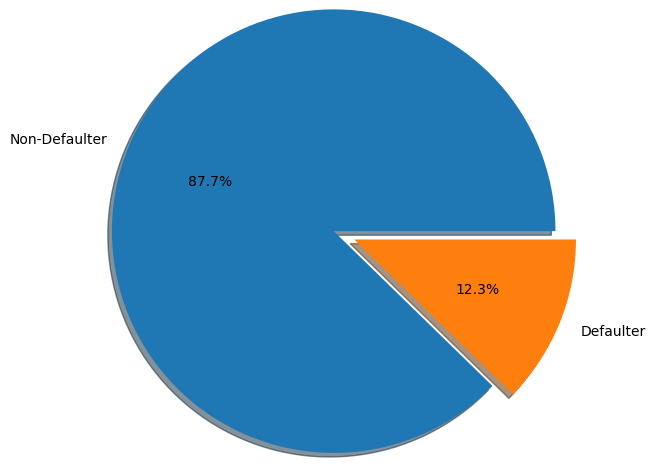

In [12]:
r = data.groupby('Risk_Flag')['Risk_Flag'].count()
plt.pie(r, explode=[0.05, 0.1], labels=['Non-Defaulter', 'Defaulter'], radius=1.5, autopct='%1.1f%%',  shadow=True);

87.7% of people are Non-Defaulter (risk flag = 0), while the other 12.3% are defaulters (risk flag = 1).

## 5b. Distribution of Age

<AxesSubplot:xlabel='Age', ylabel='Density'>

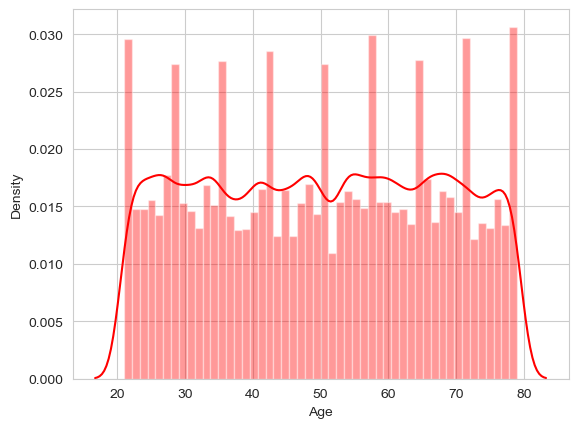

In [13]:
sns.set_style('whitegrid')
sns.distplot(data['Age'], kde = True, color ='red')

## 5c. Distribution of Income

<AxesSubplot:xlabel='Income', ylabel='Density'>

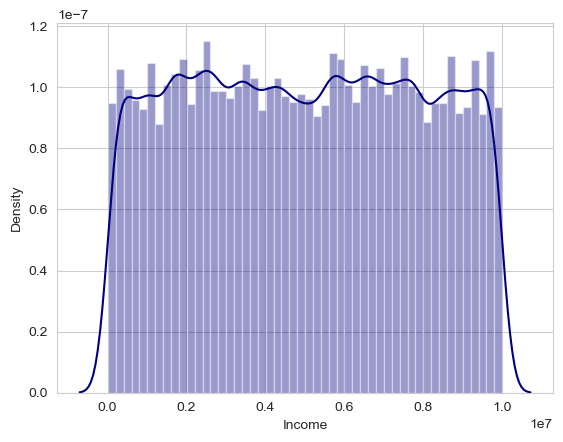

In [14]:
sns.set_style('whitegrid')
sns.distplot(data['Income'], kde = True, color ='navy')

## 5d. Effect of Marital Status on Risk Flag

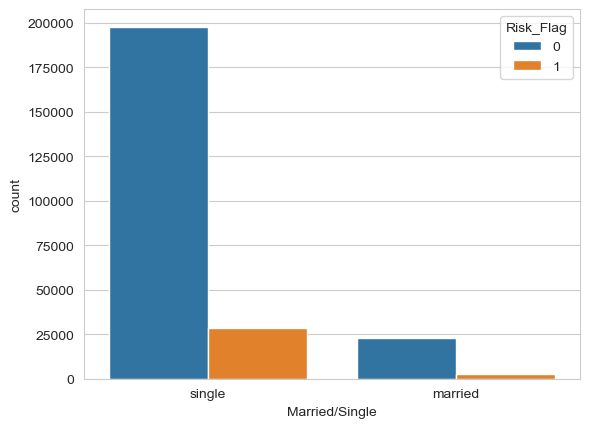

In [15]:
sns.countplot(x='Married/Single', hue='Risk_Flag', data=data);

## 5e. Effect of House ownership on Risk Flag

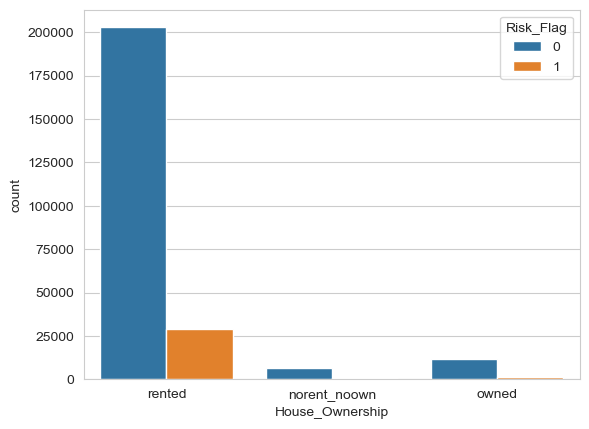

In [16]:
sns.countplot(x='House_Ownership', hue='Risk_Flag', data=data);

## 5f. Effect of Car owners on Risk Flag

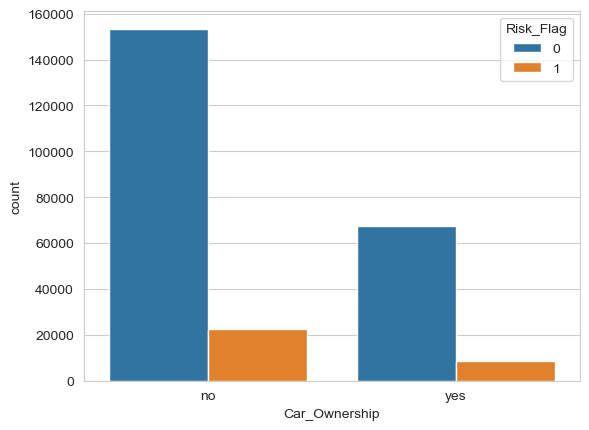

In [17]:
sns.countplot(x='Car_Ownership', hue='Risk_Flag', data=data);

# 6. Relationship of Numerical variable on target variable

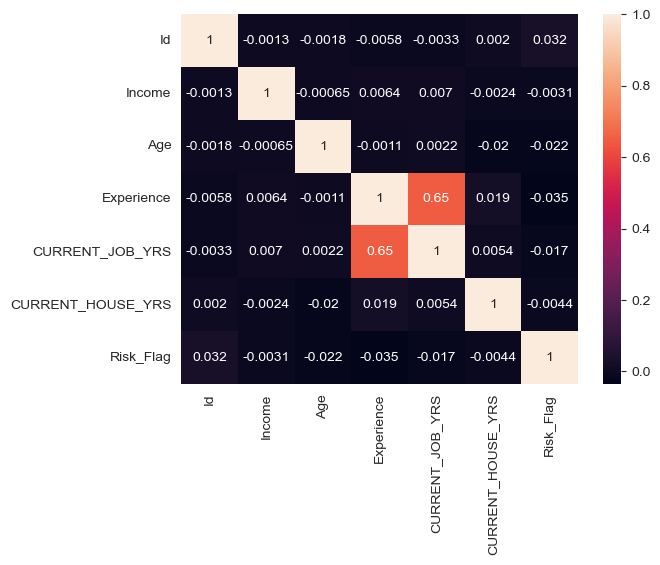

In [18]:
sns.heatmap(data.corr(), annot=True);

There are strong correlation between Experience and CURRENT_JOB_YRS (65%).

# 7. Checking for Outliers

<AxesSubplot:>

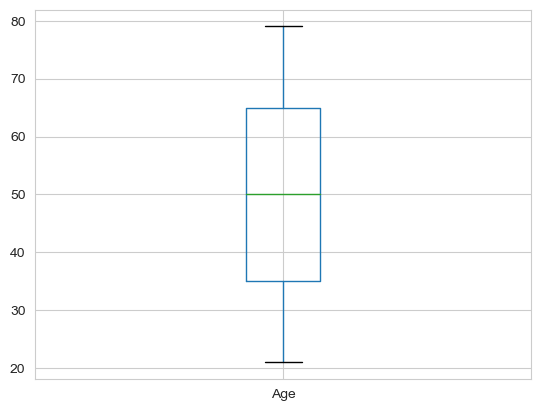

In [19]:
data.boxplot(column='Age')

<AxesSubplot:>

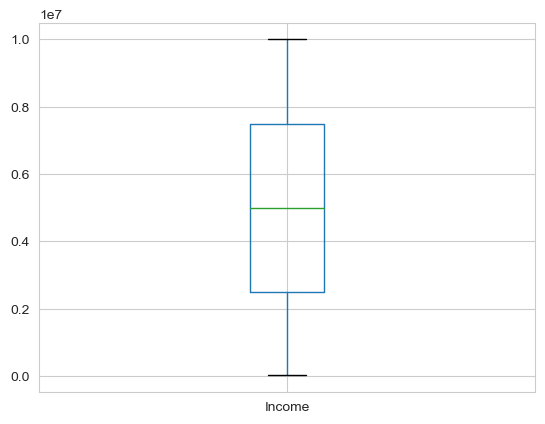

In [20]:
data.boxplot(column='Income')

There are no outliers in datasets.

# 8. Dropping the Unecessary Columns

In [21]:
X = data.drop(['Id','Risk_Flag'],axis=1)

In [22]:
y = data['Risk_Flag']

In [23]:
X.head(1)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13


# 9. Encoding The Data

In [24]:
features = ['Profession','CITY','STATE']
en = LabelEncoder()
for col in features:
    X[col] = en.fit_transform(X[col])

In [25]:
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,33,251,13,3,13
1,7574516,40,10,single,rented,no,43,227,14,9,13
2,3991815,66,4,married,rented,no,47,8,12,4,10
3,6256451,41,2,single,rented,yes,43,54,17,2,12
4,5768871,47,11,single,rented,no,11,296,22,3,14


In [26]:
X.sample(5)

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
20551,7396490,59,0,married,rented,yes,1,86,1,0,11
87209,9412724,57,0,single,rented,no,15,95,25,0,14
94146,3009196,65,9,single,rented,no,37,64,25,9,11
45662,3135789,75,1,single,rented,yes,46,308,6,1,11
147046,6976958,64,1,single,rented,no,47,230,19,1,13


In [27]:
X.shape

(252000, 11)

In [28]:
y.shape

(252000,)

# 10. Concating Label with its code

In [29]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [30]:
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,33,251,13,3,13
1,7574516,40,10,single,rented,no,43,227,14,9,13
2,3991815,66,4,married,rented,no,47,8,12,4,10
3,6256451,41,2,single,rented,yes,43,54,17,2,12
4,5768871,47,11,single,rented,no,11,296,22,3,14


## 10a. Married/Single, House_Ownership, Car_Ownership

In [31]:
X['Married/Single'] = X['Married/Single'].map({'single':0,'married':1}).astype('int')
X['House_Ownership'] = X['House_Ownership'].map({'rented':0,'norent_noown':2,'owned':1}).astype('int')
X['Car_Ownership'] = X['Car_Ownership'].map({'no':0,'yes':1}).astype('int')

In [32]:
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,0,0,0,33,251,13,3,13
1,7574516,40,10,0,0,0,43,227,14,9,13
2,3991815,66,4,1,0,0,47,8,12,4,10
3,6256451,41,2,0,0,1,43,54,17,2,12
4,5768871,47,11,0,0,0,11,296,22,3,14


## 10b. Sample File For GUI

In [33]:
M = pd.concat([X,y], axis=1, ignore_index=True)

In [34]:
M.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1303834,23,3,0,0,0,33,251,13,3,13,0
1,7574516,40,10,0,0,0,43,227,14,9,13,0
2,3991815,66,4,1,0,0,47,8,12,4,10,0
3,6256451,41,2,0,0,1,43,54,17,2,12,1
4,5768871,47,11,0,0,0,11,296,22,3,14,1


In [35]:
M.columns = ['Income','Age','Experience','Married/Single','House_Ownership','Car_Ownership','Profession','CITY'
,'STATE','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag']

In [36]:
M.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,0,0,0,33,251,13,3,13,0
1,7574516,40,10,0,0,0,43,227,14,9,13,0
2,3991815,66,4,1,0,0,47,8,12,4,10,0
3,6256451,41,2,0,0,1,43,54,17,2,12,1
4,5768871,47,11,0,0,0,11,296,22,3,14,1


In [37]:
# Sample file to csv
M.to_csv('M sample.csv')

## 10c. City

In [38]:
city_c = pd.concat([X['CITY'],data['CITY']], axis=1, ignore_index=True)
city_c.head()

,0,1
0,251,Rewa
1,227,Parbhani
2,8,Alappuzha
3,54,Bhubaneswar
4,296,Tiruchirappalli[10]


In [39]:
city_c.columns = ['Encoded City', 'City']

In [40]:
city_c = city_c.drop_duplicates().sort_values('Encoded City').reset_index(drop=True)
city_c.head()

,Encoded City,City
0,0,Adoni
1,1,Agartala
2,2,Agra
3,3,Ahmedabad
4,4,Ahmednagar


In [41]:
city_c.to_csv('city_c.csv')

## 10d. Profession and State

In [42]:
prof_c = pd.concat([X['Profession'],data['Profession']], axis=1, ignore_index=True)
state_c = pd.concat([X['STATE'],data['STATE']], axis=1, ignore_index=True)

In [43]:
prof_c.columns = ['Encoded Profession', 'Profession']
state_c.columns = ['Encoded STATE', 'STATE']

In [44]:
prof_c = prof_c.drop_duplicates().sort_values('Encoded Profession').reset_index(drop=True)
state_c = state_c.drop_duplicates().sort_values('Encoded STATE').reset_index(drop=True)

In [45]:
prof_c.to_csv('prof_c.csv')
state_c.to_csv('state_c.csv')

# 11. Feature Scaling

In [46]:
X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,0,0,0,33,251,13,3,13
1,7574516,40,10,0,0,0,43,227,14,9,13
2,3991815,66,4,1,0,0,47,8,12,4,10
3,6256451,41,2,0,0,1,43,54,17,2,12
4,5768871,47,11,0,0,0,11,296,22,3,14


In [47]:
scaler = StandardScaler()
scaler.fit(X.values)
standardized_data = scaler.transform(X.values)
print(standardized_data)

[[-1.28314486e+00 -1.57960351e+00 -1.18023232e+00 ... -8.63132830e-02
  -9.14130833e-01  7.16355856e-01]
 [ 8.95457244e-01 -5.83343640e-01 -1.40667075e-02 ...  2.03843237e-02
   7.31036347e-01  7.16355856e-01]
 [-3.49268601e-01  9.40347921e-01 -1.01363724e+00 ... -1.93010890e-01
  -6.39936303e-01 -1.42798056e+00]
 ...
 [-1.64912549e-01 -2.31722510e-01 -5.13851972e-01 ...  2.03843237e-02
   1.82647287e-01  1.57705165e-03]
 [ 5.24618196e-01 -2.90326032e-01 -1.68001759e+00 ...  4.47174751e-01
  -1.73671442e+00 -1.42798056e+00]
 [ 1.41510816e+00  1.17476201e+00  1.15209891e+00 ...  8.73965177e-01
   1.82647287e-01 -7.13201753e-01]]


In [48]:
joblib.dump(scaler,'scaler_ET')

['scaler_ET']

In [49]:
X = standardized_data
y = data['Risk_Flag']

# 12. Splitting The Dataset Into The Training Set And Test Set & Applying K-Fold Cross Validation

In [50]:
model_df={}
def model_val(model,X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.20,
                                                   random_state=42)
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    print(f"{model} accuracy is {accuracy_score(y_test,y_pred)}")
    
    score = cross_val_score(model,X,y,cv=5)
    print(f"{model} Avg cross val score is {np.mean(score)}")
    model_df[model]=round(np.mean(score)*100,2)

# 13. Machine learning model

## 13a. Logistic Regression

In [51]:
LR = LogisticRegression()
model_val(LR,X,y)

LogisticRegression() accuracy is 0.8759325396825397
LogisticRegression() Avg cross val score is 0.877


## 13b. Decision Tree Classifier

In [52]:
DTC = DecisionTreeClassifier()
model_val(DTC,X,y)

DecisionTreeClassifier() accuracy is 0.8804761904761905
DecisionTreeClassifier() Avg cross val score is 0.8751150793650794


## 13c. Random Forest Classifier

In [53]:
RFC = RandomForestClassifier()
model_val(RFC,X,y)

RandomForestClassifier() accuracy is 0.8989285714285714
RandomForestClassifier() Avg cross val score is 0.9008809523809524


## 13d. Gradient Boosting Classifier

In [54]:
GBC = GradientBoostingClassifier()
model_val(GBC,X,y)

GradientBoostingClassifier() accuracy is 0.8761309523809524
GradientBoostingClassifier() Avg cross val score is 0.8771071428571429


## 13e. KNN

In [55]:
KNN = KNeighborsClassifier()
model_val(KNN,X,y)

KNeighborsClassifier() accuracy is 0.8894642857142857
KNeighborsClassifier() Avg cross val score is 0.885047619047619


## 13f. XGBoost

In [56]:
XGB = XGBClassifier()
model_val(XGB,X,y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...) accuracy is 0.8872420634920635
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categoric

## 13g. AdaBoost Classifier

In [57]:
ABC = AdaBoostClassifier()
model_val(ABC,X,y)

AdaBoostClassifier() accuracy is 0.876031746031746
AdaBoostClassifier() Avg cross val score is 0.8770634920634921


## 13h. Passive Aggressive Classifier

In [58]:
PAC = PassiveAggressiveClassifier()
model_val(PAC,X,y)

PassiveAggressiveClassifier() accuracy is 0.8283531746031746
PassiveAggressiveClassifier() Avg cross val score is 0.7034642857142857


## 13i. Extra Tree Classifier

In [59]:
ET = ExtraTreesClassifier()
model_val(ET,X,y)

ExtraTreesClassifier() accuracy is 0.8992063492063492
ExtraTreesClassifier() Avg cross val score is 0.9012738095238095


# 14. Results

In [60]:
model_df

{LogisticRegression(): 87.7,
 DecisionTreeClassifier(): 87.51,
 RandomForestClassifier(): 90.09,
 GradientBoostingClassifier(): 87.71,
 KNeighborsClassifier(): 88.5,
 XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=None, ...): 88.79,
 AdaBoostClassifier(): 87.71,
 PassiveAggressiveClassifier(): 7

The **Extra Trees Classifier** model is the best suitable for our dataset, with an average cross-validation score of **90.13%**. Alternatively, the **Random Forest Classifier** model can also consider since it gives a score of **90.10%**.

# 15. Save the Trained Model (ExtraTreesClassifier)

In [61]:
# Save to local computer
joblib.dump(ET,'ET_model')

['ET_model']

# 16. Test the Model

In [62]:
ET = joblib.load('ET_model')
scaler = joblib.load('scaler_ET')

# Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
input_data = (7794515,51,2,0,0,0,50,146,25,2,11) # Random Input

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

std_data = scaler.transform(input_data_reshaped)
prediction = ET.predict(std_data)

if prediction[0] == 0:
    print('Non-Defaulter')
else:
    print('Defaulter')

Defaulter
